In [1]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
img_rows = 28
img_cols = 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
def ccee(y_true, y_pred):
    delta = 1e-7
    log_pred = tf.math.log(y_pred + delta)

    return -(tf.reduce_sum(tf.reduce_sum(y_true * log_pred, axis = 1)))/y_true.shape[0]

In [5]:
num_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [6]:
def create_model_( img_rows,img_cols, num_classes):
    inputs = tf.keras.Input(shape=(28, 28, 1))
    x = tf.keras.layers.Conv2D(32, kernel_size = (5,5), padding='same',
                               activation='relu')(inputs)
    x = tf.keras.layers.MaxPool2D(pool_size = (2,2),strides = (2,2))(x)
    
    x = tf.keras.layers.Conv2D(64, kernel_size = (2,2),padding='same',
                               activation='relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size = (2,2))(x)
    
    x = tf.keras.layers.Dropout(0.25)(x)
    x = tf.keras.layers.Flatten()(x)   
    x = tf.keras.layers.Dense(1000, activation='leaky_relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    model = keras.Model(inputs, outputs, name='image_class')
    return model


print(img_cols, img_rows)
model = create_model_(img_rows,img_cols, num_classes)
model.summary()

28 28
Model: "image_class"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)    

In [7]:
model.compile( loss = ccee,optimizer='adam', metrics= ['accuracy'] )
hist = model.fit(x_train, y_train, batch_size=10, epochs=  10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10


2022-06-26 12:24:22.787706: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6000/6000 [==============================] - 68s 11ms/step - loss: 0.1259 - accuracy: 0.9608 - val_loss: 0.0342 - val_accuracy: 0.9888
Epoch 2/10
6000/6000 [==============================] - 77s 13ms/step - loss: 0.0657 - accuracy: 0.9800 - val_loss: 0.0442 - val_accuracy: 0.9865
Epoch 3/10
6000/6000 [==============================] - 81s 13ms/step - loss: 0.0554 - accuracy: 0.9827 - val_loss: 0.0312 - val_accuracy: 0.9902
Epoch 4/10
6000/6000 [==============================] - 91s 15ms/step - loss: 0.0503 - accuracy: 0.9850 - val_loss: 0.0385 - val_accuracy: 0.9885
Epoch 5/10
6000/6000 [==============================] - 110s 18ms/step - loss: 0.0481 - accuracy: 0.9862 - val_loss: 0.0359 - val_accuracy: 0.9887
Epoch 6/10
6000/6000 [==============================] - 110s 18ms/step - loss: 0.0481 - accuracy: 0.9860 - val_loss: 0.0637 - val_accuracy: 0.9829
Epoch 7/10
6000/6000 [==============================] - 108s 18ms/step - loss: 0.0444 - accuracy: 0.9873 - val_loss: 0.0417 - val_acc

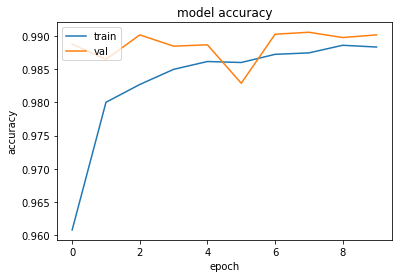

In [13]:
from matplotlib import pyplot as plt


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()